# Week 2: Day 1 PM // Decision Tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,roc_auc_score
import time
import pandas as pd

%matplotlib inline

In [2]:
mean1 = (2, 3);cov1 = [[1, 0], [0, 1]]
data_1 = np.random.multivariate_normal(mean1, cov1, (1000))

mean2 = (0, 0);cov2 = [[1, 0], [0, 1]]
data_2 = np.random.multivariate_normal(mean2, cov2, (1000))

X_1 = np.vstack([data_1,data_2])
y_1  = np.hstack([[1]*len(data_1),[2]*len(data_2)])

X_2,y_2=make_circles(n_samples=500,noise=0.2, factor=0.4, random_state=1)
X_3,y_3=make_moons(n_samples=500,noise=0.2, random_state=1)
Xs = [X_1,X_2,X_3]
ys = [y_1,y_2,y_3]

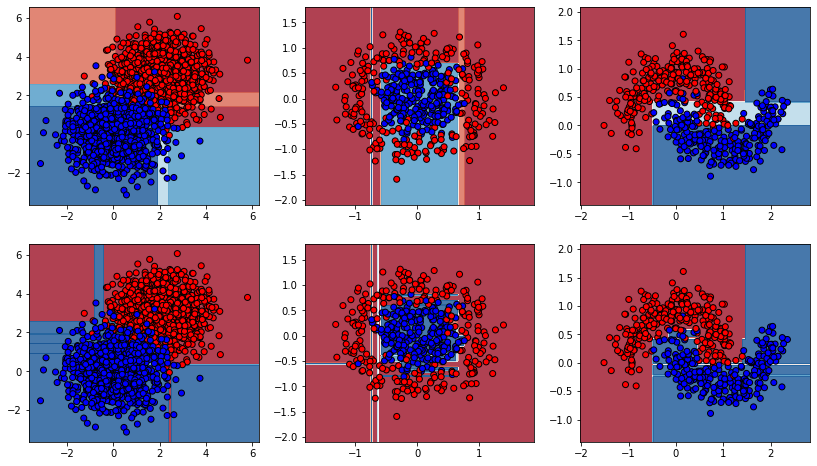

In [5]:
clf = DecisionTreeClassifier(max_depth=3)
clf_nonlin = DecisionTreeClassifier(max_depth=10)
models = [clf,clf_nonlin]
fig,axs = plt.subplots(len(models),len(Xs),figsize=(14,8))
for k in range(len(models)):
  for j in range(len(Xs)):
    X = Xs[j]
    y = ys[j]
    clf = models[k]
    clf.fit(X, y)

    h = .02  # step size in the mesh
    # just plot the dataset first
    cm = plt.cm.RdBu 
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    # Plot the training points
    #ax.scatter(X[:, 0], X[:,1], c=y, cmap=cm_bright,edgecolors='k')

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    Z = []
    for i in np.c_[xx.ravel(), yy.ravel()]:
      Z.append(clf.predict_proba(i.reshape(1, -1))[0][1])

    Z = np.array(Z)
    #Z = np.clip((Z-Z_min)/(Z_max-Z_min),0,1)
    Z = Z.reshape(xx.shape)
    #Z = np.abs(0.5-(Z-Z.min())/(Z.max()-Z.min()))
    axs[k,j].contourf(xx, yy, Z, cmap=cm, alpha=.8)
    axs[k,j].scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
                  edgecolors='k')

plt.show()